In [1]:
from twstock import stock
from twstock import realtime
import matplotlib.pyplot as plt
import pandas as pd
import sys
import sqlite3 as sql

In [2]:
#sys.path

In [ ]:
sid = 2345

stocks = realtime.get(str(sid))
name = stocks['info']['name']
stocks


In [4]:
stocks = stock.Stock(str(sid))

ConnectionError: HTTPConnectionPool(host='www.twse.com.tw', port=80): Max retries exceeded with url: /exchangeReport/STOCK_DAY?date=20190801&stockNo=2345 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x12283e610>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [101]:
stocks.close,stocks.date

([136.0,
  134.5,
  136.5,
  137.5,
  133.0,
  134.0,
  136.5,
  133.0,
  138.0,
  140.5,
  147.5,
  151.0,
  156.0,
  149.0,
  150.5,
  152.0,
  153.0,
  152.0,
  153.0,
  156.0,
  155.0,
  153.5,
  153.0,
  156.5,
  161.5,
  162.5,
  165.5,
  164.0,
  161.5,
  163.0,
  162.5],
 [datetime.datetime(2019, 7, 24, 0, 0),
  datetime.datetime(2019, 7, 25, 0, 0),
  datetime.datetime(2019, 7, 26, 0, 0),
  datetime.datetime(2019, 7, 29, 0, 0),
  datetime.datetime(2019, 7, 30, 0, 0),
  datetime.datetime(2019, 7, 31, 0, 0),
  datetime.datetime(2019, 8, 1, 0, 0),
  datetime.datetime(2019, 8, 2, 0, 0),
  datetime.datetime(2019, 8, 5, 0, 0),
  datetime.datetime(2019, 8, 6, 0, 0),
  datetime.datetime(2019, 8, 7, 0, 0),
  datetime.datetime(2019, 8, 8, 0, 0),
  datetime.datetime(2019, 8, 12, 0, 0),
  datetime.datetime(2019, 8, 13, 0, 0),
  datetime.datetime(2019, 8, 14, 0, 0),
  datetime.datetime(2019, 8, 15, 0, 0),
  datetime.datetime(2019, 8, 16, 0, 0),
  datetime.datetime(2019, 8, 19, 0, 0),
  date

In [83]:
stock_data = stocks.fetch_days(180)     # 獲取 180 天股票資料
#stock_data = stocks.fetch_from(2018,8)     # 獲取 2018 年 08 月至今日之股票資料


In [84]:
# Data Frame
stock_pd = pd.DataFrame(stock_data)
stock_pd

,date,capacity,turnover,open,high,low,close,change,transaction
0,2018-12-06,6576249,636423071,97.2,98.9,94.3,98.9,0.2,4610
1,2018-12-07,11919618,1172304434,100.0,102.5,95.5,95.8,-3.1,7961
2,2018-12-10,10784631,1002083160,94.1,96.4,90.5,92.0,-3.8,6076
3,2018-12-11,8867648,857464729,94.0,98.2,93.7,98.2,6.2,6069
4,2018-12-12,6758394,672813117,99.9,101.5,98.2,99.1,0.9,4414
...,...,...,...,...,...,...,...,...,...
175,2019-08-29,5011186,809048132,161.0,163.0,160.0,162.5,1.0,3152
176,2019-08-30,8773467,1453447088,164.5,169.5,162.0,165.5,3.0,5363
177,2019-09-02,9964013,1644950632,167.0,170.0,161.5,164.0,-1.5,5548
178,2019-09-03,8470789,1375113818,164.5,167.0,159.5,161.5,-2.5,4747


In [85]:
# calculate
stock_pd = stock_pd.set_index('date')

In [86]:
stock_pd

,capacity,turnover,open,high,low,close,change,transaction
date,,,,,,,,
2018-12-06,6576249,636423071,97.2,98.9,94.3,98.9,0.2,4610
2018-12-07,11919618,1172304434,100.0,102.5,95.5,95.8,-3.1,7961
2018-12-10,10784631,1002083160,94.1,96.4,90.5,92.0,-3.8,6076
2018-12-11,8867648,857464729,94.0,98.2,93.7,98.2,6.2,6069
2018-12-12,6758394,672813117,99.9,101.5,98.2,99.1,0.9,4414
...,...,...,...,...,...,...,...,...
2019-08-29,5011186,809048132,161.0,163.0,160.0,162.5,1.0,3152
2019-08-30,8773467,1453447088,164.5,169.5,162.0,165.5,3.0,5363
2019-09-02,9964013,1644950632,167.0,170.0,161.5,164.0,-1.5,5548


In [87]:
stock_ma3 = stock_pd.rolling(3).mean()
stock_ma5 = stock_pd.rolling(5).mean()
stock_ma8 = stock_pd.rolling(8).mean()
stock_ma20 = stock_pd.rolling(20).mean()
stock_ma60 = stock_pd.rolling(60).mean()

In [88]:
data = pd.concat([stock_ma3['close'],stock_ma5['close'],stock_ma8['close']],axis=1)
data

,close,close,close
date,,,
2018-12-06,NaN,NaN,NaN
2018-12-07,NaN,NaN,NaN
2018-12-10,95.566667,NaN,NaN
2018-12-11,95.333333,NaN,NaN
2018-12-12,96.433333,96.8,NaN
...,...,...,...
2019-08-29,160.166667,157.4,156.3750
2019-08-30,163.166667,159.8,157.9375
2019-09-02,164.000000,162.0,158.9375


In [89]:
std = data.std(axis=1)

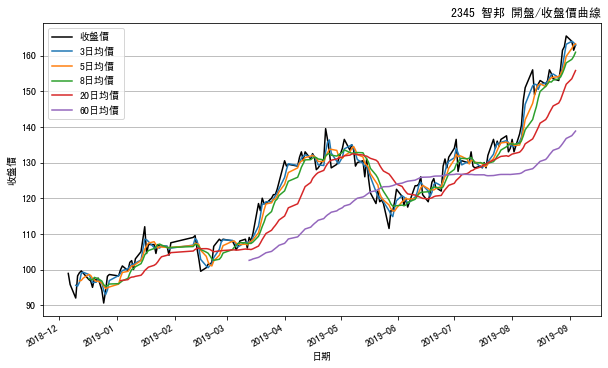

In [90]:
fig = plt.figure(figsize=(10, 6))

#plt.plot(stock_6207_2018_pd.close, '-' , label="收盤價")
plt.plot(stock_pd.close, '-' , label="收盤價",color='k')
plt.plot(stock_ma3.close, '-' , label="3日均價")
plt.plot(stock_ma5.close, '-' , label="5日均價")
plt.plot(stock_ma8.close, '-' , label="8日均價")
plt.plot(stock_ma20.close, '-' , label="20日均價")
plt.plot(stock_ma60.close, '-' , label="60日均價")

plt.title('%d %s 開盤/收盤價曲線' % (sid,name) ,loc='right')

# loc->title的位置
plt.xlabel('日期')
plt.ylabel('收盤價')
plt.grid(True, axis='y')
plt.legend()
fig.autofmt_xdate()
fig.savefig('day20_01.png')
plt.show()

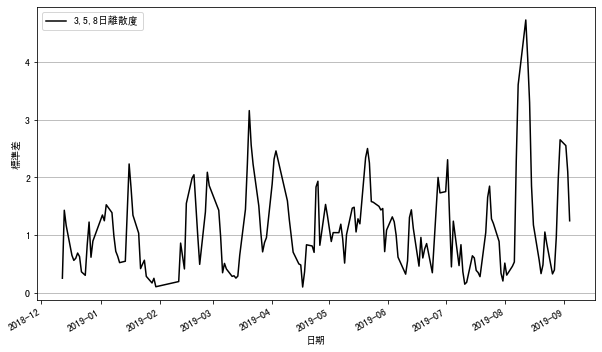

In [102]:
fig = plt.figure(figsize=(10, 6))

plt.plot(std, '-' , label="3,5,8日離散度",color='k')

plt.xlabel('日期')
plt.ylabel('標準差')
plt.grid(True, axis='y')
plt.legend()
fig.autofmt_xdate()
plt.show()

In [104]:
std.mean()

1.130168432902149

In [106]:
sid = 2330
stocks = realtime.get(str(sid))
name = stocks['info']['name']


In [107]:
stocks = stock.Stock(str(sid))
stock_data = stocks.fetch_days(180) 

In [109]:
stock_pd = pd.DataFrame(stock_data)
stock_pd = stock_pd.set_index('date')
stock_ma3 = stock_pd.rolling(3).mean()
stock_ma5 = stock_pd.rolling(5).mean()
stock_ma8 = stock_pd.rolling(8).mean()
stock_ma20 = stock_pd.rolling(20).mean()
stock_ma60 = stock_pd.rolling(60).mean()


In [110]:
data = pd.concat([stock_ma3['close'],stock_ma5['close'],stock_ma8['close']],axis=1)
std = data.std(axis=1)

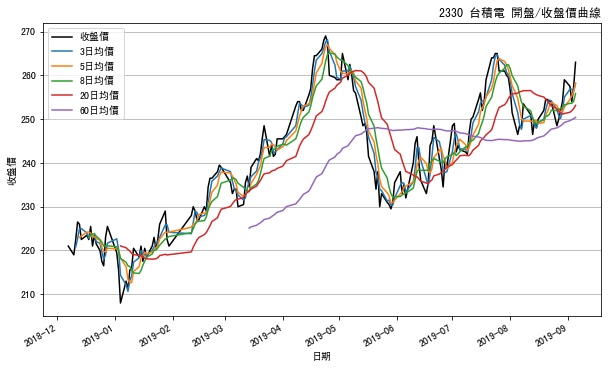

In [111]:
fig = plt.figure(figsize=(10, 6))


#plt.plot(stock_6207_2018_pd.close, '-' , label="收盤價")
plt.plot(stock_pd.close, '-' , label="收盤價",color='k')
plt.plot(stock_ma3.close, '-' , label="3日均價")
plt.plot(stock_ma5.close, '-' , label="5日均價")
plt.plot(stock_ma8.close, '-' , label="8日均價")
plt.plot(stock_ma20.close, '-' , label="20日均價")
plt.plot(stock_ma60.close, '-' , label="60日均價")

plt.title('%d %s 開盤/收盤價曲線' % (sid,name) ,loc='right')

# loc->title的位置
plt.xlabel('日期')
plt.ylabel('收盤價')
plt.grid(True, axis='y')
plt.legend()
fig.autofmt_xdate()
fig.savefig('day%s.png'%(name))
plt.show()

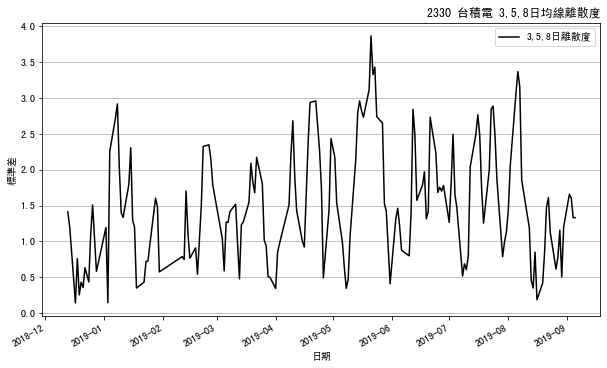

In [115]:
fig = plt.figure(figsize=(10, 6))

plt.plot(std, '-' , label="3,5,8日離散度",color='k')

plt.title('%d %s 3,5,8日均線離散度' % (sid,name) ,loc='right')
plt.xlabel('日期')
plt.ylabel('標準差')
plt.grid(True, axis='y')
plt.legend()
fig.autofmt_xdate()
fig.savefig('day%s_std.png'%(name))
plt.show()

In [138]:
std[-1]

1.3328210821550814

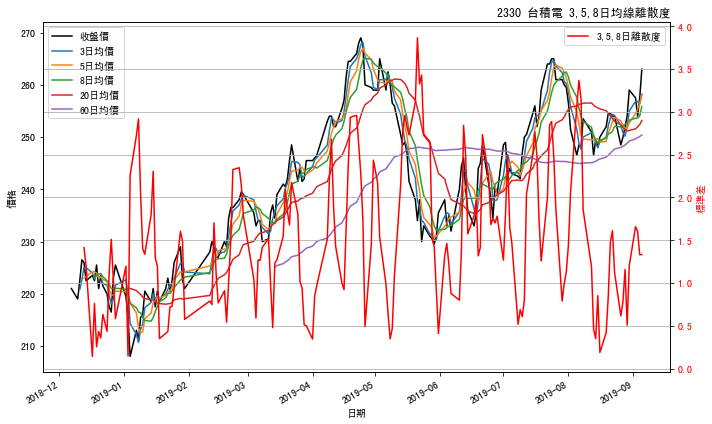

In [132]:

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('日期')
ax1.set_ylabel('價格')

ax1.plot(stock_pd.close, '-' , label="收盤價",color='k')
ax1.plot(stock_ma3.close, '-' , label="3日均價")
ax1.plot(stock_ma5.close, '-' , label="5日均價")
ax1.plot(stock_ma8.close, '-' , label="8日均價")
ax1.plot(stock_ma20.close, '-' , label="20日均價")
ax1.plot(stock_ma60.close, '-' , label="60日均價")
ax1.plot(stock_pd.capacity, '-' , label="成交量",color='')
ax1.tick_params(axis='y', labelcolor='k')
ax1.legend()

ax2 = ax1.twinx()
ax2.set_ylabel('標準差',color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.plot(std, '-' , label="3,5,8日離散度",color='r')


plt.title('%d %s 3,5,8日均線離散度' % (sid,name) ,loc='right')
ax2.legend()
fig.autofmt_xdate()
fig.tight_layout() 
plt.grid(True,which='both')
fig.savefig('day%s_std.png'%(name))
plt.show()

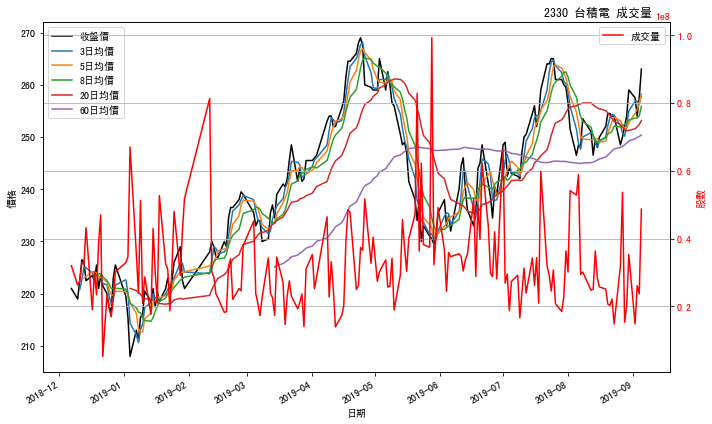

In [134]:

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('日期')
ax1.set_ylabel('價格')

ax1.plot(stock_pd.close, '-' , label="收盤價",color='k')
ax1.plot(stock_ma3.close, '-' , label="3日均價")
ax1.plot(stock_ma5.close, '-' , label="5日均價")
ax1.plot(stock_ma8.close, '-' , label="8日均價")
ax1.plot(stock_ma20.close, '-' , label="20日均價")
ax1.plot(stock_ma60.close, '-' , label="60日均價")
ax1.tick_params(axis='y', labelcolor='k')
ax1.legend()

ax2 = ax1.twinx()
ax2.set_ylabel('股數',color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.plot(stock_pd.capacity, '-' , label="成交量",color='r')


plt.title('%d %s 成交量   ' % (sid,name) ,loc='right')
ax2.legend()
fig.autofmt_xdate()
fig.tight_layout() 
plt.grid(True,which='both')
fig.savefig('day%s_capacity.png'%(name))
plt.show()

In [137]:
pd.DataFrame(stocks.data)

,date,capacity,turnover,open,high,low,close,change,transaction
0,2018-12-07,31997568,7097739916,222.5,223.5,220.5,221.0,1.0,8315
1,2018-12-10,26229461,5744814170,219.5,220.0,218.5,219.0,-2.0,8650
2,2018-12-11,27395220,6067551383,220.0,223.0,219.0,222.5,3.5,8509
3,2018-12-12,32926379,7418108779,223.5,227.0,222.5,226.5,4.0,9117
4,2018-12-13,32433141,7345479366,227.0,227.5,225.0,226.0,-0.5,8635
...,...,...,...,...,...,...,...,...,...
175,2019-08-30,35299201,9092482858,256.5,259.0,256.0,259.0,5.0,13703
176,2019-09-02,14776854,3800453292,258.0,258.0,256.0,257.5,-1.5,7608
177,2019-09-03,26086495,6642868555,256.5,258.0,253.0,254.0,-3.5,11210
178,2019-09-04,23697733,6081456520,254.0,258.0,254.0,257.5,3.5,9291
